In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/class_data_science/PandasForDataManipulation/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Types**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Syntax or Spelling errors**


In [4]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Missing fields?**

In [5]:
#Figuring out how many missing values in the dataset:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Out of 8523 records there are 1463 items with missing "Item_Weight"; this will affect the analysis of the sales prediction data. I can try and find the exame same items in different rows and find out if the "Item_Weight" field was filled in and hence fill in the missing ones.
Another 2410 records are missing the Outlet_Size.

In [6]:
#The following method will find the Item_Weight from it's Item_Identifier and sends it back to the called
def filling(identifier_value):  
    return df.loc[(df['Item_Weight'].isnull() == False) & (df['Item_Identifier'] == identifier_value), 'Item_Weight'].head(1).item()

#looping in the rows and for each missing Item_Weight get the Item_Identifier and call the above method to get the existing Item_Weight for the Item_Identifier 
for index, row in df.iterrows():
  if pd.isnull(row['Item_Weight']):
    try:
      df.loc[index:index, ('Item_Weight')] = filling(row['Item_Identifier'])      
    except ValueError:
      pass
      #print(ValueError.args)

#P.S. had to figure our the try catch error handler becuase some Items didn't have any known Item Weight for other rows based on the Item_Identifier

# confirm the missing fields for the Item_Weight has been modified
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Leaving this section to decide on the missing 4 Item_weight values.

In [ ]:
#Leaving this section to after learning about the outlet sizes and if the data can be found in any other data sets.

**Part 3 of Project 1**

In [45]:
import matplotlib.pyplot as plt
import math
import numpy as np

Visalize the unique outlets with the total weight of all items in each outlet.

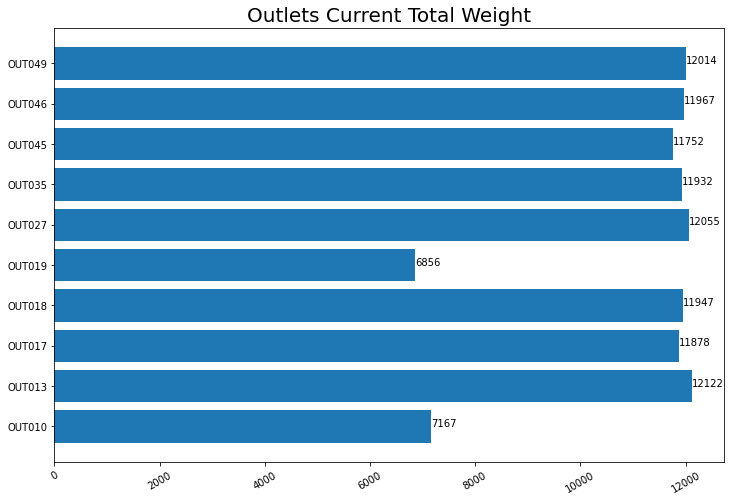

In [23]:
outlet_weights = df.groupby(['Outlet_Identifier'])['Item_Weight'].sum()
#outlet_weights
plt.figure(figsize = (12, 8));
plt.title('outlets current total weight'.title(), fontsize=20)
plt.barh(outlet_weights.index, outlet_weights.values);
plt.xticks(rotation = 30);
for index, value in enumerate(outlet_weights.values):
    plt.text(value, index, str(math.ceil(value)))


Visualize the fat Content per each outlet

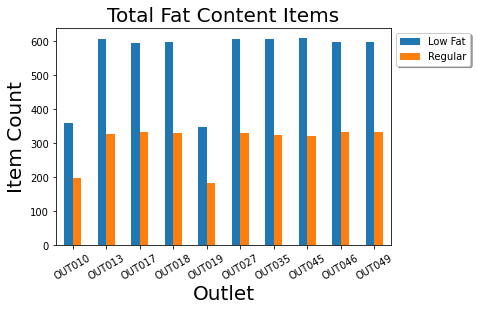

In [124]:
df.groupby(['Outlet_Identifier','Item_Fat_Content'])['Item_Fat_Content'].count().unstack().plot(kind='bar')

plt.title('total fat content items'.title(), fontsize=20)
plt.xticks(rotation = 30);
plt.xlabel('Outlet', fontsize=20)
plt.ylabel('Item Count', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);

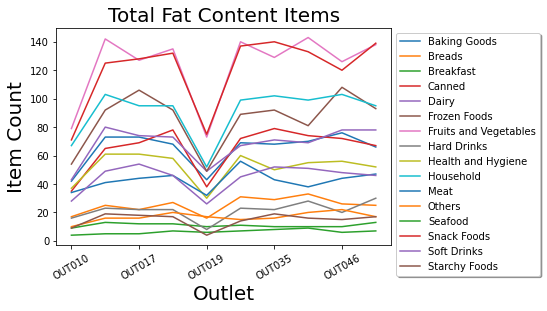

In [123]:
total_type = df.groupby(['Outlet_Identifier','Item_Type'])['Item_Type'].count().unstack()
total_type.plot()

plt.title('total fat content items'.title(), fontsize=20)
plt.xticks(rotation = 30);
plt.xlabel('Outlet', fontsize=20)
plt.ylabel('Item Count', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);
#plt.figure(figsize = (12, 8));

Depending on the audience, there are many other way to visualize the statistics of this data set.

I will start with displaying the top 5 sale items in each outlet

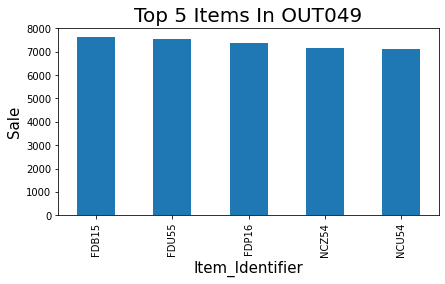

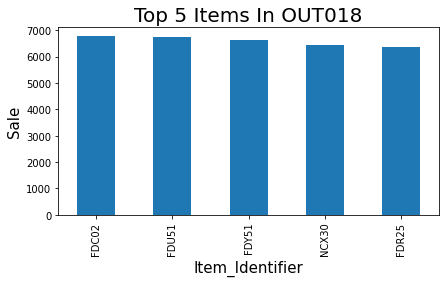

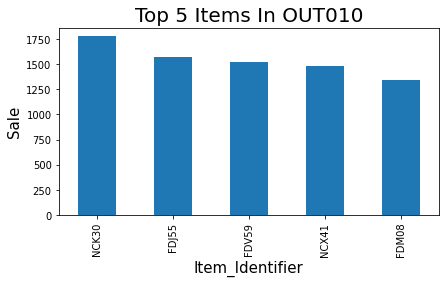

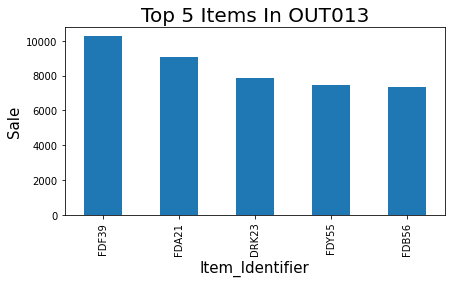

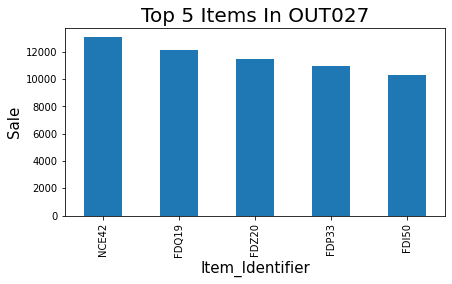

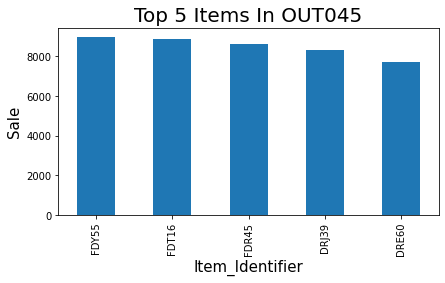

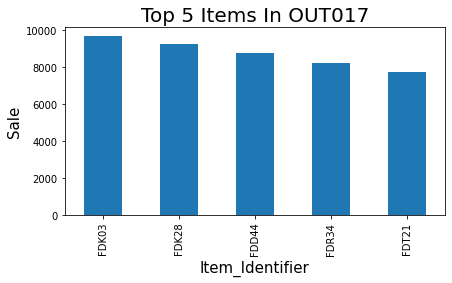

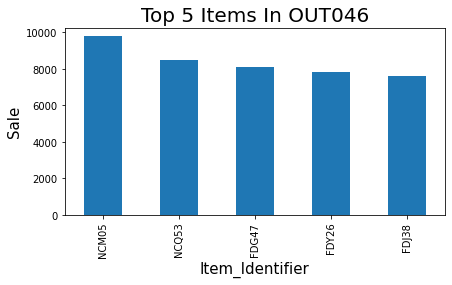

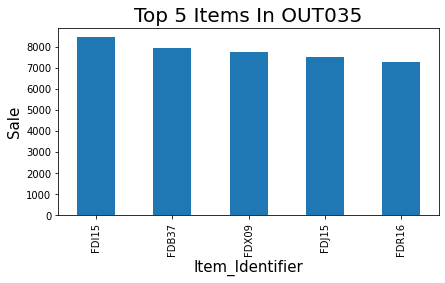

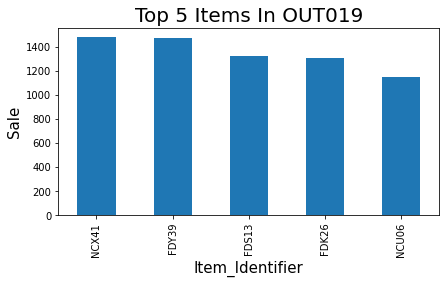

In [248]:
outlets = df['Outlet_Identifier'].unique()
for i, v in enumerate(outlets):  
  plt.figure(figsize = (15, 20))
  plt.subplot(5, 2, i+1)
  plt.title('top 5 items in '.title() + v, fontsize=20)
  plt.xticks(rotation = 30)
  plt.xlabel('Items', fontsize=15)
  plt.ylabel('Sale', fontsize=15)
  g = df.loc[df['Outlet_Identifier']== v].groupby(['Item_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(5)
  g.plot(kind='bar')  
  

I am also assuming everyone would want to see the total sales for each outlet

Text(0, 0.5, 'Sale')

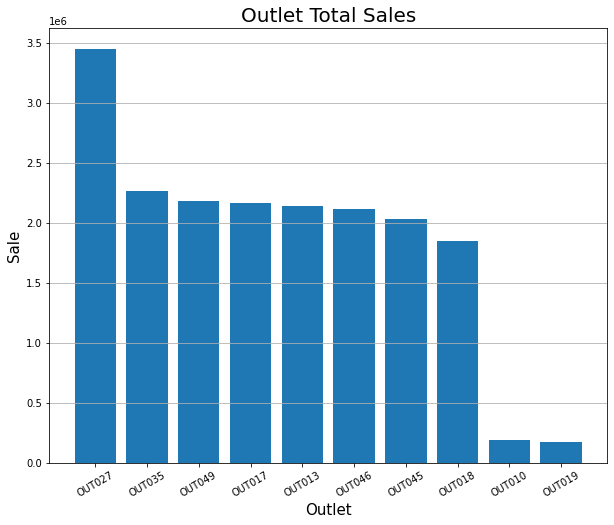

In [265]:
total_sales = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize = (10, 8))
#ploting = total_sales.plot(kind='bar')
plt.bar(total_sales.index, total_sales.values);
plt.title('outlet total sales'.title(), fontsize=20)
plt.xticks(rotation = 30)
plt.grid(axis='y')

plt.xlabel('Outlet', fontsize=15)
plt.ylabel('Sale', fontsize=15)